## SUV predictions

In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Reading data
data = pd.read_csv('/home/tuandinh/Desktop/MachineLearning/Logistics Regression/suv dataset/suv_data.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [122]:
data.shape

(400, 5)

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [124]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [125]:
data = pd.get_dummies(data, columns = ['Gender'], drop_first=True)

In [126]:
data.head(3)

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0


In [127]:
data = data.drop(columns=['User ID'], axis=1)

In [128]:
data.head()

,Age,EstimatedSalary,Purchased,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


In [129]:
income_category = []
for i in range (0, len  (data ['EstimatedSalary'])):
    if data ['EstimatedSalary'][i] <= 19500:
        income_category.append ('Very Low');
    elif 19500 < data ['EstimatedSalary'][i] <= 40000:
        income_category.append ('Low');
    elif 40000 < data ['EstimatedSalary'][i] <= 60000:
        income_category.append ('Moderately Low');
    elif 60000 < data ['EstimatedSalary'][i] <= 80000:
        income_category.append ('Medium');
    elif 80000 < data ['EstimatedSalary'][i] <= 100000:
        income_category.append ('Moderately high');
    elif 100000 < data ['EstimatedSalary'][i] <= 130000:
        income_category.append ('Very High');
    elif 130000 < data ['EstimatedSalary'][i] <= 145000:
        income_category.append ('Very High');
    else:
        income_category.append ('Extremely High');

income_data_frame = pd.DataFrame(data=income_category, columns=['IncomeCategory'])
data = pd.concat([data, income_data_frame],axis=1)
data.head()

,Age,EstimatedSalary,Purchased,Gender_Male,IncomeCategory
0,19,19000,0,1,Very Low
1,35,20000,0,1,Low
2,26,43000,0,0,Moderately Low
3,27,57000,0,0,Moderately Low
4,19,76000,0,1,Medium


<AxesSubplot:xlabel='Purchased', ylabel='count'>

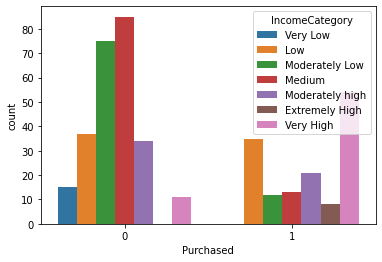

In [130]:
sns.countplot ( x = 'Purchased', hue = 'IncomeCategory', data = data)

In [131]:
data = pd.get_dummies(data=data, columns=['IncomeCategory'], drop_first=True)
data.head()

,Age,EstimatedSalary,Purchased,Gender_Male,IncomeCategory_Low,IncomeCategory_Medium,IncomeCategory_Moderately Low,IncomeCategory_Moderately high,IncomeCategory_Very High,IncomeCategory_Very Low
0,19,19000,0,1,0,0,0,0,0,1
1,35,20000,0,1,1,0,0,0,0,0
2,26,43000,0,0,0,0,1,0,0,0
3,27,57000,0,0,0,0,1,0,0,0
4,19,76000,0,1,0,1,0,0,0,0


In [132]:
X = data.drop(columns=['Purchased'])
Y = data['Purchased']
X.head()

,Age,EstimatedSalary,Gender_Male,IncomeCategory_Low,IncomeCategory_Medium,IncomeCategory_Moderately Low,IncomeCategory_Moderately high,IncomeCategory_Very High,IncomeCategory_Very Low
0,19,19000,1,0,0,0,0,0,1
1,35,20000,1,1,0,0,0,0,0
2,26,43000,0,0,0,1,0,0,0
3,27,57000,0,0,0,1,0,0,0
4,19,76000,1,0,1,0,0,0,0


In [133]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

model = LogisticRegression(solver='liblinear', max_iter=100)
model.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [134]:
y_predict = model.predict(x_test)

/home/tuandinh/Desktop/MachineLearning/tuanenv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [135]:
from sklearn.metrics import accuracy_score
accuracy_score(y_predict, y_test)

0.7

In [136]:
from sklearn.metrics import classification_report
report = classification_report(y_predict, y_test)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.74      0.78        58
           1       0.46      0.59      0.52        22

    accuracy                           0.70        80
   macro avg       0.65      0.67      0.65        80
weighted avg       0.73      0.70      0.71        80

